In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Defining paths

In [29]:
_root_dir = "/code"
_data_dir = os.path.join(_root_dir, "data")
_logs_dir = os.path.join(_root_dir, "logs")
# filename = "3 Cabinets - BIRDTRACK FY19 - APR21.xlsx"
filename = "3 Cabinets - CASREP FY19 - APR21.xlsx"

In [30]:
df = pd.read_excel(
    os.path.join(
        _data_dir,
        filename
    ),
    sheet_name=0
)

df.head()

UNIT NAME TYCOM           DOCNO    UIC Series   FSC FUND_CODE  \
0       DDG 83 HOWARD  CNSP  R229999193W084  22999      W  5998        NB   
1  DDG 75 DONALD COOK  CNSL  V219499212W299  21949      W  5960        SB   
2       DDG 70 HOPPER  CNSP  R2194492200852  21944      0  5910        NR   
3       DDG 61 RAMAGE  CNSL  V218239221CF56  21823      C  4720        SR   
4       DDG 58 LABOON  CNSL  V2182092591312  21820      1  5998        SR   

  PROJECT  QTY      NIIN  ... UNIT PRICE  PRIORITY  RDD  IPG  \
0     729    1  12568682  ...        NaN       3.0  999  1.0   
1     765    1  13926982  ...        NaN       1.0  999  1.0   
2     EE5    2  12624133  ...     4626.6       4.0  777  2.0   
3     EK5    1  12604153  ...        NaN       4.0  777  2.0   
4     EE5    1  12647770  ...        NaN       4.0  777  2.0   

   SOURCE OF SUPPLY DATE_ORDERED  DATE_SHIPPED  DATE_RECEIVED  \
0               QA5        43658       43662.0        43670.0   
1               SLM        43677       43678.0        43686.0   
2               AN5        43685       43690.0        43697.0   
3               AN5        43686       43715.0        43734.0   
4               AN5        43724       43725.0        43743.0   

   IS_PENDING_BACKORDER  IS_COMPLETE_BACKORDER  
0                     0                      0  
1                     0                      0  
2                     0                      0  
3                     0                      0  
4                     0                      0  

[5 rows x 21 columns]

In [31]:
df.corr()

UIC       FSC       QTY  UNIT PRICE  PRIORITY  \
UIC                    1.000000 -0.014091  0.023795   -0.050582  0.142226   
FSC                   -0.014091  1.000000 -0.035044    0.028515 -0.032590   
QTY                    0.023795 -0.035044  1.000000   -0.068542  0.050307   
UNIT PRICE            -0.050582  0.028515 -0.068542    1.000000 -0.177108   
PRIORITY               0.142226 -0.032590  0.050307   -0.177108  1.000000   
IPG                   -0.031741 -0.036918  0.033319   -0.207515  0.901248   
DATE_ORDERED          -0.092872  0.059099 -0.036190    0.053331 -0.004124   
DATE_SHIPPED          -0.000731  0.042430 -0.038196    0.039365 -0.009602   
DATE_RECEIVED         -0.116900  0.046185 -0.034657    0.056250 -0.007151   
IS_PENDING_BACKORDER   0.030700  0.032076 -0.040800    0.005626  0.034423   
IS_COMPLETE_BACKORDER -0.043886  0.001007 -0.041869    0.123520 -0.057899   

                            IPG  DATE_ORDERED  DATE_SHIPPED  DATE_RECEIVED  \
UIC                   -0.031741     -0.092872     -0.000731      -0.116900   
FSC                   -0.036918      0.059099      0.042430       0.046185   
QTY                    0.033319     -0.036190     -0.038196      -0.034657   
UNIT PRICE            -0.207515      0.053331      0.039365       0.056250   
PRIORITY               0.901248     -0.004124     -0.009602      -0.007151   
IPG                    1.000000      0.034685      0.025141       0.027149   
DATE_ORDERED           0.034685      1.000000      0.989252       0.965308   
DATE_SHIPPED           0.025141      0.989252      1.000000       0.977100   
DATE_RECEIVED          0.027149      0.965308      0.977100       1.000000   
IS_PENDING_BACKORDER   0.049703      0.242170      0.119237            NaN   
IS_COMPLETE_BACKORDER -0.045640     -0.008341      0.054996       0.091356   

                       IS_PENDING_BACKORDER  IS_COMPLETE_BACKORDER  
UIC                                0.030700              -0.043886  
FSC                                0.032076               0.001007  
QTY                               -0.040800              -0.041869  
UNIT PRICE                         0.005626               0.123520  
PRIORITY                           0.034423              -0.057899  
IPG                                0.049703              -0.045640  
DATE_ORDERED                       0.242170              -0.008341  
DATE_SHIPPED                       0.119237               0.054996  
DATE_RECEIVED                           NaN               0.091356  
IS_PENDING_BACKORDER               1.000000              -0.073055  
IS_COMPLETE_BACKORDER             -0.073055               1.000000

Visualizing with Plotly Express

In [12]:
import plotly.express as px

In [32]:
px.scatter_matrix(
    df,
#     dimensions=["ENDUSER", "CASREP_CATEGORY", "FSC", "QUANTITY", "PRICE", "NET_PRICE"],
#     color="STATUS",
)

Visualizing with Seaborn

In [24]:
import seaborn as sn

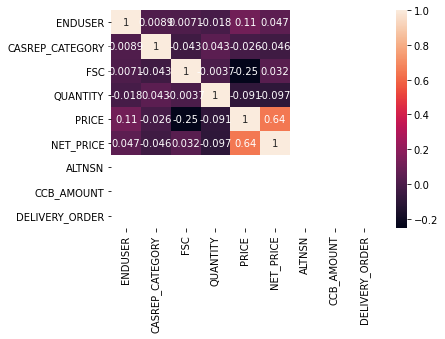

In [25]:
sn.heatmap(df.corr(), annot=True)
plt.show()

In [28]:
df["NEW_COL"] = df["STATUS_DATE"] - df["ESD_SHIPPED"]

df.head()

COMMAND TYCOM     REQUISITION  ENDUSER         STATUS_DATE STATUS  \
0  JOHN FINN  CNSP  R200100081W050    20010 2020-03-24 10:05:50     AS   
1  JOHN FINN  CNSP  R200100081W051    20010 2020-04-01 11:25:42     AS   
2  JOHN FINN  CNSP  R200100087W054    20010 2020-04-21 04:36:55     AS   
3  JOHN FINN  CNSP  R200100130W072    20010 2020-05-14 10:43:33     AS   
4  JOHN FINN  CNSP  R200100139W075    20010 2020-06-05 09:03:02     AS   

          ESD_SHIPPED                                            REMARKS  \
0 2020-03-24 10:15:15  MATL O/H UNIT LSR MANNY ANULAO, FFT TO UNIT. A...   
1 2020-04-01 00:00:00                                         UNIT RECON   
2 2020-04-21 00:00:00                                         UNIT RECON   
3 2020-05-14 00:00:00  MATL O/H DDDC SAN DIEGO FFT TO UNIT. AWAITING ...   
4 2020-06-05 00:00:00                                         UNIT RECON   

  CASREP_NUMBER  CASREP_CATEGORY  ...  BV_DATE BV_RIC_TO             BA_DATE  \
0         20020                2  ...      NaT       NaN                 NaT   
1         20020                2  ...      NaT       NaN 2020-03-23 08:59:21   
2         20023                2  ...      NaT       NaN                 NaT   
3         20036                2  ...      NaT       NaN                 NaT   
4         20036                2  ...      NaT       NaN 2020-05-21 06:55:18   

  BA_RIC_TO             AS_DATE  AS_RIC_TO AS_AT_DESTINATION_DATE  \
0       NaN 2020-03-23 08:34:01        SDX    2020-03-24 10:05:50   
1       SDX 2020-03-24 11:34:31        SDX    2020-03-25 10:42:39   
2       NaN 2020-04-07 11:53:03        SDX    2020-04-13 10:34:42   
3       NaN 2020-05-13 08:53:02        SDX    2020-05-13 12:30:10   
4       SDX 2020-05-21 07:14:04        SDX    2020-05-26 09:20:58   

  AS_AT_DESTINATION_RIC_TO DELIVERY_ORDER           NEW_COL  
0                      SDX            NaN -1 days +23:50:35  
1                      SDX            NaN   0 days 11:25:42  
2                      SDX            NaN   0 days 04:36:55  
3                      SDX            NaN   0 days 10:43:33  
4                      SDX            NaN   0 days 09:03:02  

[5 rows x 51 columns]

In [33]:
df.columns

Index(['UNIT NAME', 'TYCOM', 'DOCNO', 'UIC', 'Series', 'FSC', 'FUND_CODE',
       'PROJECT', 'QTY', 'NIIN', 'NSN_NAME', 'UNIT PRICE', 'PRIORITY', 'RDD',
       'IPG', 'SOURCE OF SUPPLY', 'DATE_ORDERED', 'DATE_SHIPPED',
       'DATE_RECEIVED', 'IS_PENDING_BACKORDER', 'IS_COMPLETE_BACKORDER'],
      dtype='object')

In [36]:
from datetime import datetime

<AxesSubplot:ylabel='Density'>

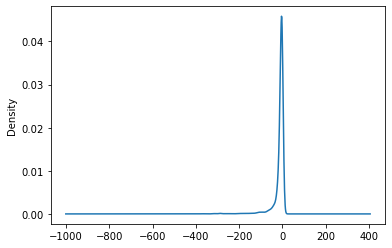

In [47]:
(df["DATE_ORDERED"] - df["DATE_SHIPPED"]).plot.kde()